## Healthcare Data Analysis

### Group Members
* Timothy Mutisya. REG No.902542
* Odhiambo Joseph Otieno. REG No.901597
* Peter Muthui REG. 902615
* Dennis Maina REG NO.902095
* Robert Okora Ondieki REG. 902415
* Sheila wangui REG NO. 902021
* Risper Mwangi Reg No 902292
* Jessie Kweya Reg No. 901766
* Peris Piera Njeri Reg No.901734
* Caleb Mainye Reg No. 902275
* Alex  Reg No. 901685
* Judah wambua Reg No 901525
* Thorne Musau Reg No 902274.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly as py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import  accuracy_score, confusion_matrix, RocCurveDisplay
from sklearn.decomposition import PCA

## Data Cleaning and Preprocessing

### Data Overview

Our  dataset ``Healthcare Data.csv`` includes  several  columns  capturing  various  aspects  of  healthcare  access  and 
utilization: 
1. Timestamp: When the data was recorded. 
2. Age: Age group of the respondent. 
3. Gender: Gender of the respondent. 
4. Marital Status: Marital status of the respondent. 
5. How many children do you have, if any?: Number of children. 
6. Employment Status: Employment status of the respondent. 
7. Monthly Household Income: Monthly household income bracket. 
8. Have you ever had health insurance?: If the respondent has ever had health insurance. 
9. If yes, which insurance cover?: Type of insurance cover. 
10. When was the last time you visited a hospital for medical treatment? (In Months): 
Time since the last hospital visit. 
11. Did  you  have  health  insurance  during  your  last  hospital  visit?:  Health  insurance 
status during the last hospital visit. 
12. Have you ever had a routine check-up with a doctor or healthcare provider?: If 
the respondent has ever had a routine check-up. 
13. If yes, what time period (in years) do you stay before having your routine check-
up?: Frequency of routine check-ups. 
14. Have you ever had a cancer screening (e.g., mammogram, colonoscopy, etc.)?: If 
the respondent has ever had a cancer screening. 
15. If  yes,  what  time  period  (in  years)  do  you  stay  before  having  your  Cancer 
screening?: Frequency of cancer screenings. 
16. GeoCode: Geographical coordinates of the respondent's location. 
17. GeoAddress: Address of the respondent

In [2]:
df = pd.read_csv('Healthcare Data.csv', encoding='latin1')
df =df.drop(['Dirty1', 'Dirty2', 'Timestamp'], axis=1)

# Dictionary mapping old column names to new column names
rename_dict = {
    'Age': 'Patient_Age',
    'Gender': 'Patient_Gender',
    'Marital_status': 'Marital_Status',
    'Children': 'Number_of_Children',
    'Employment_status': 'Employment_Status',
    'Monthly Household Income': 'Monthly_Income',
    'Have you ever had health insurance?': 'Had_Health_Insurance',
    'Insurance': 'Current_Insurance',
    'last_visit': 'Last_Visit',
    'Did you have health insurance during your last hospital visit?': 'Insurance_During_Last_Visit',
    'Have you ever had a routine check-up with a doctor or healthcare provider?': 'Routine_Checkup',
    'If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?': 'Checkup_Interval_Years',
    'Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?': 'Had_Cancer_Screening',
    'If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?': 'Cancer_Screening_Interval_Years',
    'GeoCode': 'Geographical_Code',
    'GeoAddress': 'Geographical_Address'
}

# Rename the columns using the dictionary
df = df.rename(columns=rename_dict)
df.head()

Patient_Age Patient_Gender Marital_Status  Number_of_Children  \
0       18-30           Male         Single                   0   
1       18-30           Male         Single                   0   
2       18-30           Male         Single                   0   
3       18-30           Male         Single                   0   
4       18-30           Male         Single                   0   

  Employment_Status   Monthly_Income Had_Health_Insurance Current_Insurance  \
0           Student  Less than 10000                  Yes             AMACO   
1           Student      10001-20000                   No      No Insurance   
2        Unemployed  Less than 10000                   No      No Insurance   
3        Unemployed  Less than 10000                   No      No Insurance   
4           Student  Less than 10000                   No      No Insurance   

   Last_Visit Insurance_During_Last_Visit Routine_Checkup  \
0        29.0                          No              No   
1        10.0                          No              No   
2         1.0                          No              No   
3        11.0                          No              No   
4        12.0                          No              No   

   Checkup_Interval_Years Had_Cancer_Screening  \
0                       0                   No   
1                       0                   No   
2                       0                   No   
3                       0                   No   
4                       0                   No   

   Cancer_Screening_Interval_Years      Geographical_Code  \
0                                0  -1.2852333,36.8556432   
1                                0   -0.7274496,37.158912   
2                                0  -0.7284222,37.1501468   
3                                0  -1.2852333,36.8556432   
4                                0        -1.2841,36.8155   

                                Geographical_Address  
0  Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...  
1                          75F5+5GC, Murang'a, Kenya  
2                                         C71, Kenya  
3  Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...  
4          Kenyatta Market, PR88+959, Nairobi, Kenya

In [3]:
df['Geographical_Code'].fillna('Unknown', inplace=True)
df['Geographical_Address'].fillna('Unknown', inplace=True)
nan_counts = df.isnull().sum()
print("Total NaN values per column:")
print(nan_counts)

Total NaN values per column:
Patient_Age                        0
Patient_Gender                     0
Marital_Status                     0
Number_of_Children                 0
Employment_Status                  0
Monthly_Income                     0
Had_Health_Insurance               0
Current_Insurance                  0
Last_Visit                         0
Insurance_During_Last_Visit        0
Routine_Checkup                    0
Checkup_Interval_Years             0
Had_Cancer_Screening               0
Cancer_Screening_Interval_Years    0
Geographical_Code                  0
Geographical_Address               0
dtype: int64


In [4]:
# Columns to be one-hot encoded
columns_to_encode = ['Had_Health_Insurance', 'Insurance_During_Last_Visit', 'Routine_Checkup', 'Had_Cancer_Screening']

# Apply one-hot encoding
for column in columns_to_encode:
    df[column] = df[column].apply(lambda x: 1 if x == 'Yes' else 0)

df.dtypes

Patient_Age                         object
Patient_Gender                      object
Marital_Status                      object
Number_of_Children                   int64
Employment_Status                   object
Monthly_Income                      object
Had_Health_Insurance                 int64
Current_Insurance                   object
Last_Visit                         float64
Insurance_During_Last_Visit          int64
Routine_Checkup                      int64
Checkup_Interval_Years               int64
Had_Cancer_Screening                 int64
Cancer_Screening_Interval_Years      int64
Geographical_Code                   object
Geographical_Address                object
dtype: object

## Exploratory Data Analysis

#### 1. Demographic Analysis

To  understand  the  demographic  distribution  (age,  gender,  marital 
status) of our respondent

**Impact**: By analyzing demographic data, we can identify which groups are most 
in  need  of  healthcare  services.  This  helps  tailor  healthcare  interventions  to 
specific  populations,  ensuring  resources  are  directed  where  they  are  most 
needed. s

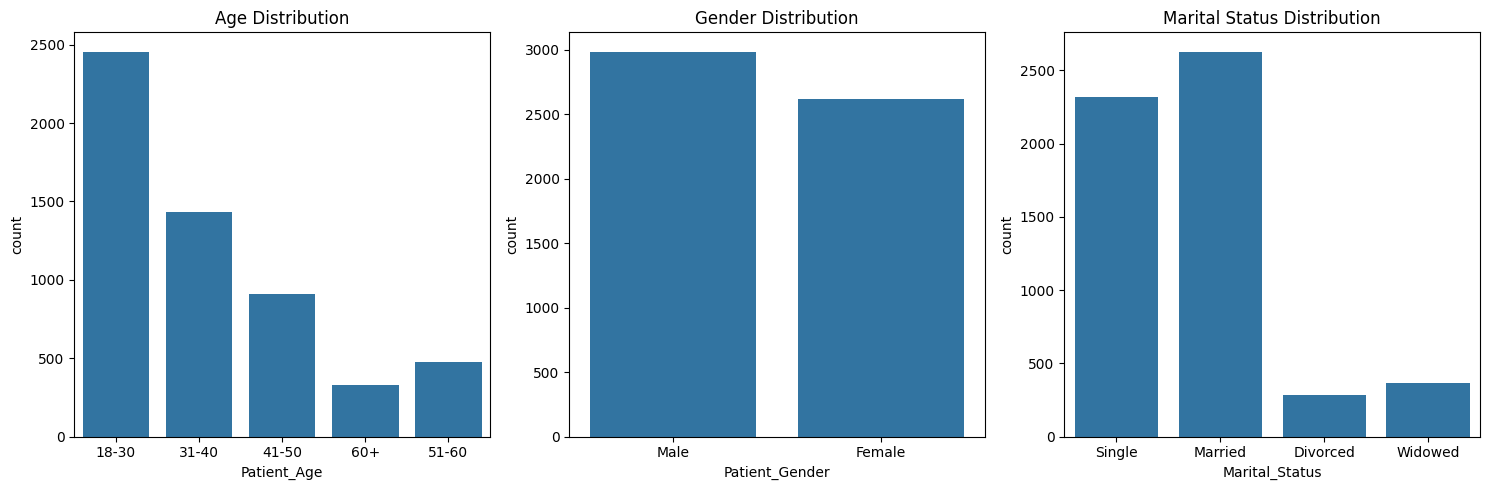

In [5]:
# Plotting distributions
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Age distribution
sns.countplot(x='Patient_Age', data=df, ax=axs[0])
axs[0].set_title('Age Distribution')

# Gender distribution
sns.countplot(x='Patient_Gender', data=df, ax=axs[1])
axs[1].set_title('Gender Distribution')

# Marital status distribution
sns.countplot(x='Marital_Status', data=df, ax=axs[2])
axs[2].set_title('Marital Status Distribution')

plt.tight_layout()
plt.show()

* **``Patient Age``** - From the analysis we can observe that the majority of the data cosists of the young population aged between (18-30) years and the least count of occurence being the people over the age of 60 (60+)
* **``Patient Gender``** - There are more males than females in the overall dataset

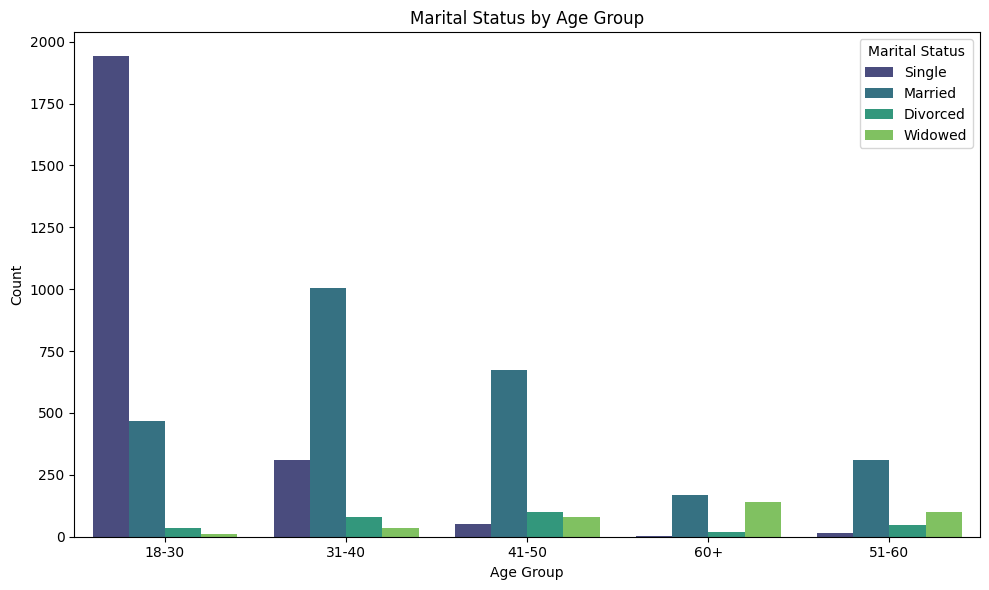

In [6]:
# Plotting count plot of Marital status and age
plt.figure(figsize=(10, 6))
sns.countplot(x='Patient_Age', hue='Marital_Status', data=df, palette='viridis')
plt.title('Marital Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()

* **``Marital Status``** - We can observe that the data consists of individuals who are mostly married with the least occurence of marital status being those who are divorced.

We can get the following insights from the above data plot

1. The majority of individuals in the 18-30 age group are single, which is consistent with the expectation that younger people are more likely to be unmarried.
2. The 31-40 age group has a significant number of married individuals, indicating that this is a common age range for marriage.
3. The 41-50 age group also has a notable number of married individuals, though it appears slightly less than the 31-40 age group. This suggests that many individuals remain married as they age.

Patient_Gender  Female  Male
Patient_Age                 
18-30             1085  1371
31-40              679   753
41-50              485   423
51-60              213   261
60+                153   177


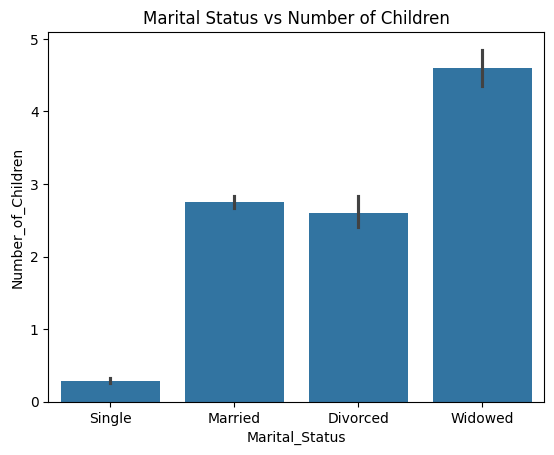

In [7]:
# Crosstab for Age and Gender
age_gender_crosstab = pd.crosstab(df['Patient_Age'], df['Patient_Gender'])
print(age_gender_crosstab)

# Bar plot for Marital Status and Number of Children
sns.barplot(x='Marital_Status', y='Number_of_Children', data=df)
plt.title('Marital Status vs Number of Children')
plt.show()

* Single individuals have the lowest average number of children. This is expected as single individuals are less likely to have children compared to those who are married or have been married.
* Married individuals have a higher average number of children compared to single individuals. This aligns with the general trend that married couples are more likely to have children.

#### 2. Health Insurance coverage

To determine the prevalence of health insurance coverage and identify 
the types of insurance.

**Impact**:  Understanding  insurance  coverage  allows  us  to  gauge  the  financial 
protection  available  to  the  population.  This  insight  can  drive  initiatives  to 
increase  insurance  uptake,  reducing  the  financial  burden  on  individuals  and 
promoting broader access to healthcare services. 

C:\Users\Thorne\AppData\Local\Temp\ipykernel_14060\2793734151.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_insurance.values, y=top_insurance.index, palette='viridis')


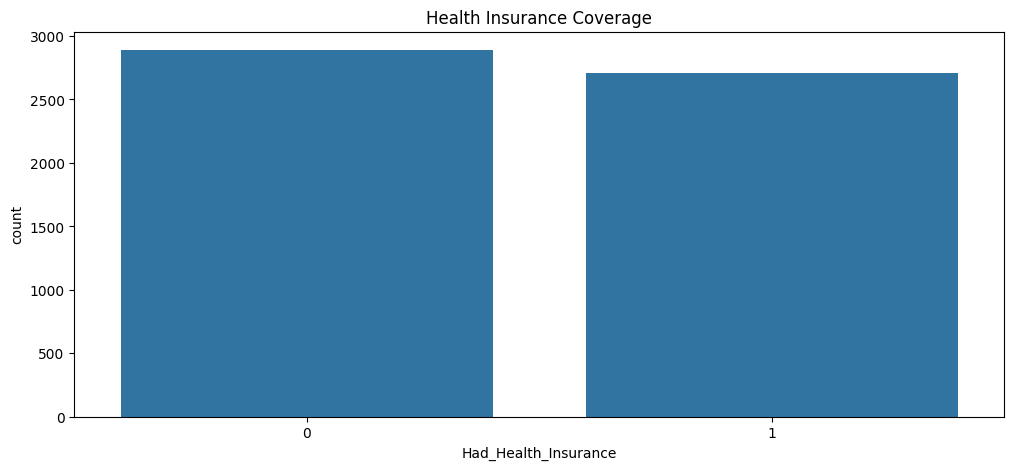

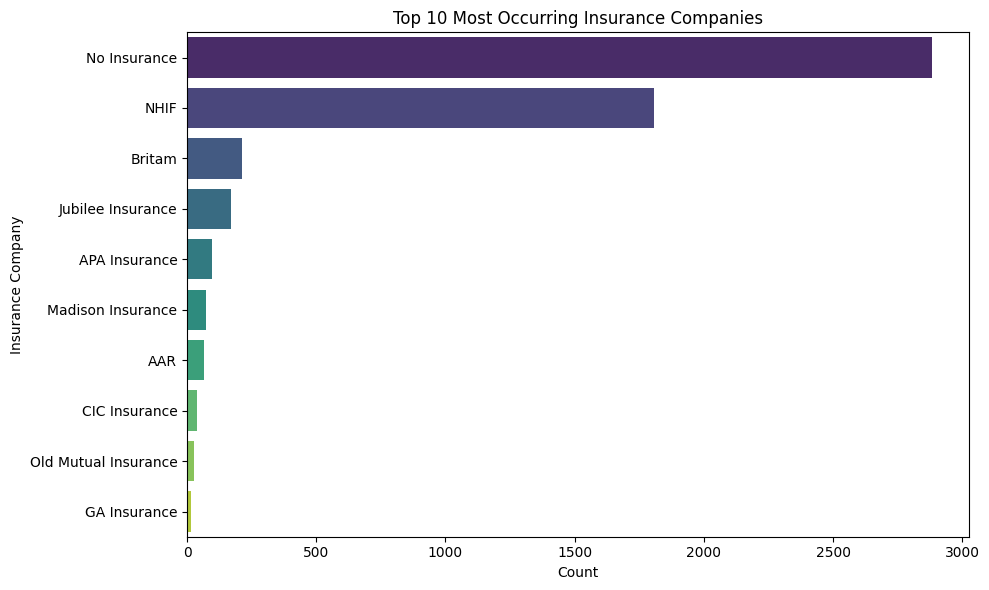

In [8]:
# Plotting distributions
fig, axs = plt.subplots(1, 1, figsize=(12, 5))

# Health insurance coverage
sns.countplot(x='Had_Health_Insurance', data=df, ax=axs)
axs.set_title('Health Insurance Coverage')

# Plotting the top 10 most occuring types of insurance using seaborn

top_insurance = df['Current_Insurance'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_insurance.values, y=top_insurance.index, palette='viridis')
plt.title('Top 10 Most Occurring Insurance Companies')
plt.xlabel('Count')
plt.ylabel('Insurance Company')
plt.tight_layout()
plt.show()

**``Insights``**

* **High Rate of Uninsured Individuals**: The most significant insight is that he majority of respondents have no insurance. This suggests that there is a large portion of the population without health insurance coverage, which may indicate barriers to accessing insurance or a lack of awareness about the importance of health insurance.
* **Prevalence of NHIF**: The National Hospital Insurance Fund (NHIF) is the second most common, which indicates that it is the primary source of health insurance for those who are insured. NHIF is likely the most accessible and affordable option for many individuals.
* **Other Insurance Companies**: The other insurance companies listed, such as Britam, Jubilee Insurance, APA Insurance, Madison Insurance, AAR, CIC Insurance, Old Mutual Insurance, and GA Insurance, have significantly fewer counts compared to NHIF. This could imply that these companies are either less popular, more expensive, or offer services that are not as well-known or accessible.
* **Concentration of Insurance Coverage**: The steep drop-off in counts from NHIF to the other companies suggests that insurance coverage is highly concentrated in a few providers, with NHIF being the dominant player. This might also reflect market dynamics and the reach of these insurance providers.

**``Implications``**
* **Policy Focus on Increasing Insurance Coverage**: Given the high number of uninsured individuals, policymakers and stakeholders might need to focus on strategies to increase health insurance coverage. This could include public awareness campaigns, subsidies, or policy changes to make insurance more affordable and accessible.
* **Strengthening NHIF**: Since NHIF is the most common insurance provider, efforts to strengthen and expand NHIF services could have a significant impact on improving health insurance coverage and healthcare access.
* **Diversifying Insurance Options**: Encouraging the growth and reach of other insurance companies could provide more options for individuals, potentially making insurance more competitive and affordable.


#### 3. Healthcare Utilization
To  analyze  how  frequently  individuals  visit  hospitals  and  undergo 
routine check-ups

**Impact**:  Insights  into  healthcare  utilization  reveal  potential  gaps  in  access  to 
medical  services.  This  can  guide  policy  changes  and  healthcare  infrastructure 
improvements to ensure timely and adequate medical care for all segments of 
the population..

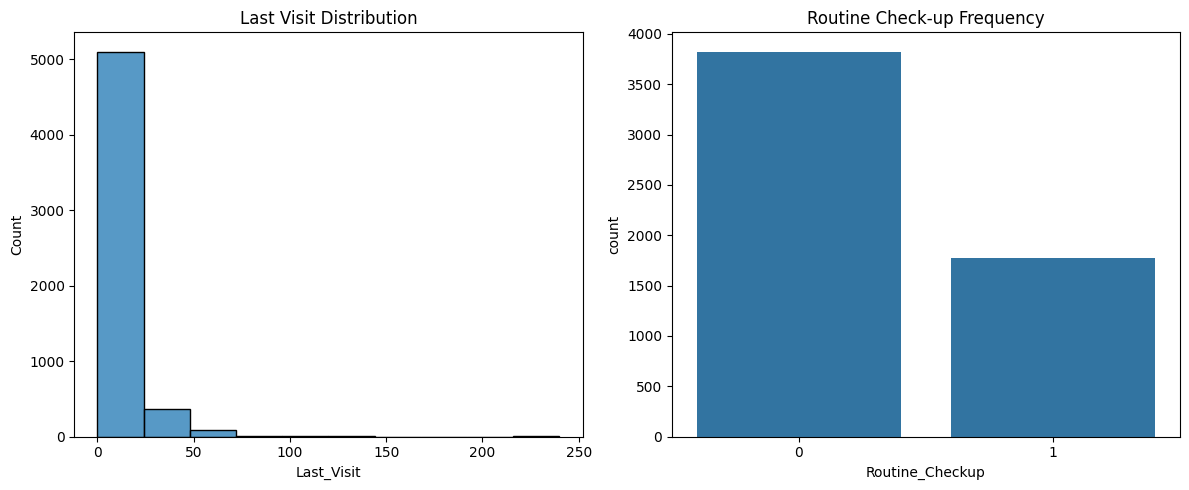

In [9]:
# Plotting distributions
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Last visit distribution
sns.histplot(df['Last_Visit'], bins=10, ax=axs[0])
axs[0].set_title('Last Visit Distribution')

# Routine check-up frequency
sns.countplot(x='Routine_Checkup', data=df, ax=axs[1])
axs[1].set_title('Routine Check-up Frequency')

plt.tight_layout()
plt.show()

From the observation on the plot, we can see that a high number of population do not have routine check-ups.

#### Preventive Health Measures

To  examine  the  prevalence  and  frequency  of  preventive  health 
measures like routine check-ups and cancer screening

**Impact**:  Identifying  barriers  to  preventive  healthcare  helps  promote  early 
detection and treatment  of diseases. This can lead to reduced healthcare  costs 
and improved health outcomes through timely interventions.s

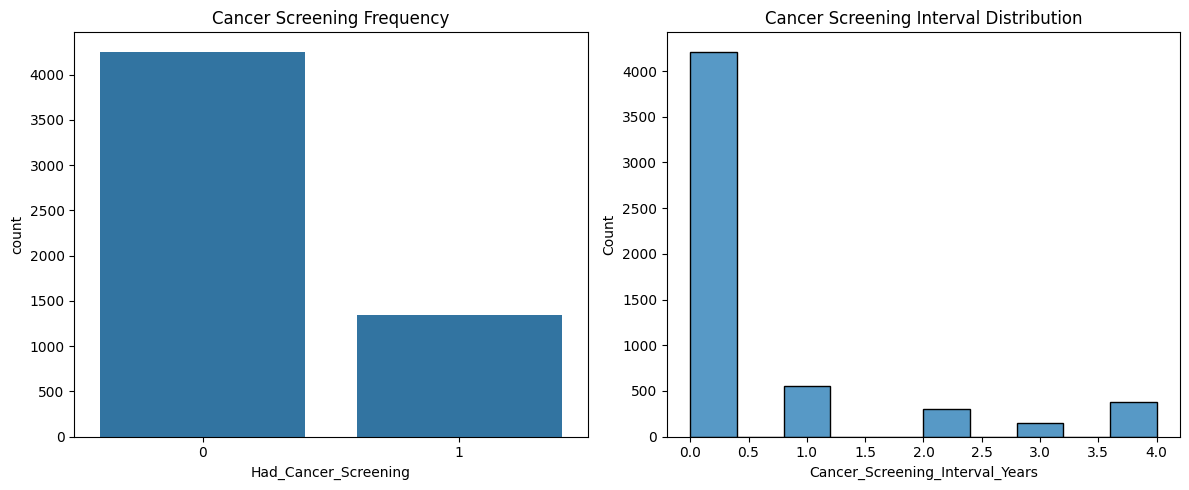

In [10]:
# Plotting distributions
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Cancer screening frequency
sns.countplot(x='Had_Cancer_Screening', data=df, ax=axs[0])
axs[0].set_title('Cancer Screening Frequency')

# Cancer screening interval
sns.histplot(df['Cancer_Screening_Interval_Years'], bins=10, ax=axs[1])
axs[1].set_title('Cancer Screening Interval Distribution')

plt.tight_layout()
plt.show()

#### Geographical Analysis

To map healthcare utilization and insurance coverage across different 
geographical regions

**Impact**:  Geographical  analysis  can  pinpoint  regions  with  poor  healthcare 
access,  enabling  targeted  improvements.  This  ensures  equitable  healthcare 
distribution and helps address regional disparities in health outcomes. .

In [11]:
pip install folium.clear()

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement folium.clear (from versions: none)
ERROR: No matching distribution found for folium.clear


In [12]:
# Plot the geographical distribution of respondents
import folium
from folium.plugins import MarkerCluster

# Create a map
map_kenya = folium.Map(location=[0.0236, 37.9062], zoom_start=6)

# Add points to the map
marker_cluster = MarkerCluster().add_to(map_kenya)

for idx, row in df.iterrows():
    # Skip rows where Geographical_Code is 'unknown'
    if row['Geographical_Code'] == 'unknown':
        continue
    
    # Split the Geographical_Code into latitude and longitude
    geo_code = row['Geographical_Code'].split(',')
    
    # Ensure that the Geographical_Code has both latitude and longitude
    if len(geo_code) == 2:
        try:
            latitude = float(geo_code[0])
            longitude = float(geo_code[1])
            folium.Marker([latitude, longitude], popup=row['Geographical_Address']).add_to(marker_cluster)
        except ValueError:
            # Handle the case where latitude or longitude is not a valid float
            pass  # Skip this row silently
    # No need to handle else condition for invalid Geographical_Code here

# Display the map
map_kenya

#### Socioeconomic Factors

To  explore  the  relationship  between  socioeconomic  status  (income, 
employment) and healthcare outcomes

**Impact**: Understanding the link between socioeconomic factors and healthcare 
access  can  highlight  the  need  for  economic  and  social  policies  that  support 
health equity. This can lead to more inclusive healthcare strategies that address 
the needs of economically disadvantaged populations...

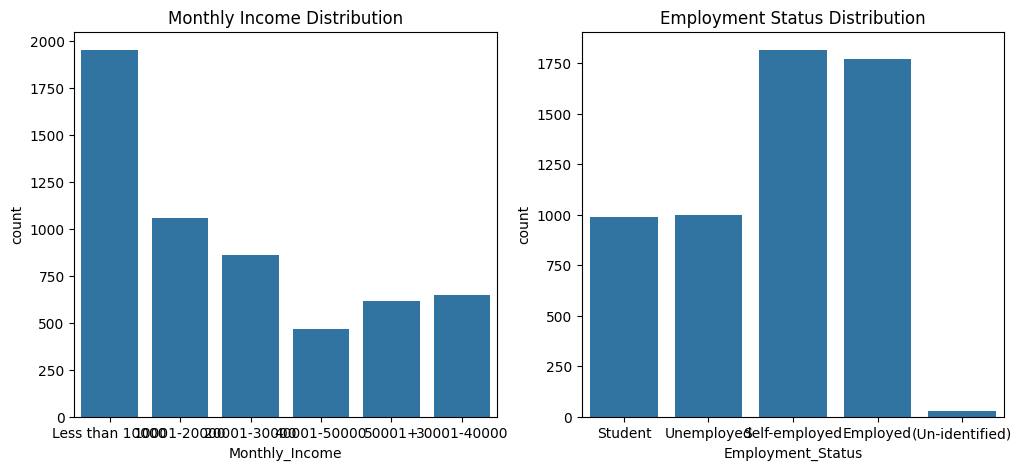

In [13]:
# Plotting distributions
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Monthly income distribution
sns.countplot(x='Monthly_Income', data=df, ax=axs[0])
axs[0].set_title('Monthly Income Distribution')

# Employment status distribution
sns.countplot(x='Employment_Status', data=df, ax=axs[1])
axs[1].set_title('Employment Status Distribution')


plt.show()

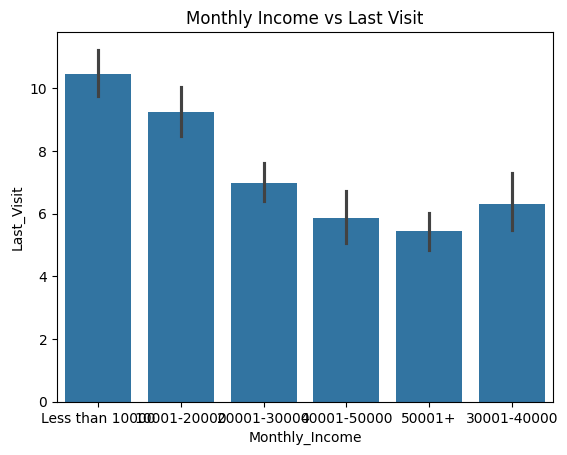

In [14]:
# Bar plot for Monthly Income and Last Visit
sns.barplot(x='Monthly_Income', y='Last_Visit', data=df)
plt.title('Monthly Income vs Last Visit')
plt.show()

In [15]:
## Encoding 
df.describe(include="object")

Patient_Age Patient_Gender Marital_Status Employment_Status  \
count         5600           5600           5600              5600   
unique           5              2              4                 5   
top          18-30           Male        Married     Self-employed   
freq          2456           2985           2628              1816   

         Monthly_Income Current_Insurance Geographical_Code  \
count              5600              5600              5600   
unique                6                58              2243   
top     Less than 10000      No Insurance           Unknown   
freq               1953              2882              2077   

       Geographical_Address  
count                  5600  
unique                 1482  
top                 Unknown  
freq                   2080

In [16]:
df['Patient_Gender']=df['Patient_Gender'].replace(["Male","Female"],[1,0])

#lets convert Insurer column to numeric type
df['Current_Insurance'] = df['Current_Insurance'].astype('category')
df['Current_Insurance'] = df['Current_Insurance'].cat.codes
df.head()

Patient_Age  Patient_Gender Marital_Status  Number_of_Children  \
0       18-30               1         Single                   0   
1       18-30               1         Single                   0   
2       18-30               1         Single                   0   
3       18-30               1         Single                   0   
4       18-30               1         Single                   0   

  Employment_Status   Monthly_Income  Had_Health_Insurance  Current_Insurance  \
0           Student  Less than 10000                     1                  3   
1           Student      10001-20000                     0                 46   
2        Unemployed  Less than 10000                     0                 46   
3        Unemployed  Less than 10000                     0                 46   
4           Student  Less than 10000                     0                 46   

   Last_Visit  Insurance_During_Last_Visit  Routine_Checkup  \
0        29.0                            0                0   
1        10.0                            0                0   
2         1.0                            0                0   
3        11.0                            0                0   
4        12.0                            0                0   

   Checkup_Interval_Years  Had_Cancer_Screening  \
0                       0                     0   
1                       0                     0   
2                       0                     0   
3                       0                     0   
4                       0                     0   

   Cancer_Screening_Interval_Years      Geographical_Code  \
0                                0  -1.2852333,36.8556432   
1                                0   -0.7274496,37.158912   
2                                0  -0.7284222,37.1501468   
3                                0  -1.2852333,36.8556432   
4                                0        -1.2841,36.8155   

                                Geographical_Address  
0  Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...  
1                          75F5+5GC, Murang'a, Kenya  
2                                         C71, Kenya  
3  Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...  
4          Kenyatta Market, PR88+959, Nairobi, Kenya

In [17]:
print(df["Last_Visit"].max())
print(df["Last_Visit"].min())

240.0
0.0


In [18]:
df["Last_Visit(Years)"] = df["Last_Visit"]/12
df = df.drop(columns="Last_Visit")
print(df["Last_Visit(Years)"].max())

20.0


In [19]:
df.head()

Patient_Age  Patient_Gender Marital_Status  Number_of_Children  \
0       18-30               1         Single                   0   
1       18-30               1         Single                   0   
2       18-30               1         Single                   0   
3       18-30               1         Single                   0   
4       18-30               1         Single                   0   

  Employment_Status   Monthly_Income  Had_Health_Insurance  Current_Insurance  \
0           Student  Less than 10000                     1                  3   
1           Student      10001-20000                     0                 46   
2        Unemployed  Less than 10000                     0                 46   
3        Unemployed  Less than 10000                     0                 46   
4           Student  Less than 10000                     0                 46   

   Insurance_During_Last_Visit  Routine_Checkup  Checkup_Interval_Years  \
0                            0                0                       0   
1                            0                0                       0   
2                            0                0                       0   
3                            0                0                       0   
4                            0                0                       0   

   Had_Cancer_Screening  Cancer_Screening_Interval_Years  \
0                     0                                0   
1                     0                                0   
2                     0                                0   
3                     0                                0   
4                     0                                0   

       Geographical_Code                               Geographical_Address  \
0  -1.2852333,36.8556432  Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...   
1   -0.7274496,37.158912                          75F5+5GC, Murang'a, Kenya   
2  -0.7284222,37.1501468                                         C71, Kenya   
3  -1.2852333,36.8556432  Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...   
4        -1.2841,36.8155          Kenyatta Market, PR88+959, Nairobi, Kenya   

   Last_Visit(Years)  
0           2.416667  
1           0.833333  
2           0.083333  
3           0.916667  
4           1.000000

In [20]:
df["Marital_Status"].unique()

array(['Single', 'Married', 'Divorced', 'Widowed'], dtype=object)

In [21]:
df["Employment_Status"].unique()
df["Monthly_Income"].unique()

array(['Less than 10000', '10001-20000', '20001-30000', '40001-50000',
       '50001+', '30001-40000'], dtype=object)

In [22]:
marital_mapping  = {
    'Single': 0,
    'Married': 1,
    'Divorced': 2,
    'Widowed': 3
}

age_mapping = {
    '18-30': 24,
    '31-40': 35,
    '41-50': 45,
    '51-60': 55,
    '60+': 65
}

employment_mapping = {
    'Employed': 0,
    'Unemployed': 1,
    'Self-employed': 2,
    '(Un-identified)': 3,
    'Student': 4
}

### Unsupervised Learning 

#### K-Means clustering

In [23]:
df.head()

Patient_Age  Patient_Gender Marital_Status  Number_of_Children  \
0       18-30               1         Single                   0   
1       18-30               1         Single                   0   
2       18-30               1         Single                   0   
3       18-30               1         Single                   0   
4       18-30               1         Single                   0   

  Employment_Status   Monthly_Income  Had_Health_Insurance  Current_Insurance  \
0           Student  Less than 10000                     1                  3   
1           Student      10001-20000                     0                 46   
2        Unemployed  Less than 10000                     0                 46   
3        Unemployed  Less than 10000                     0                 46   
4           Student  Less than 10000                     0                 46   

   Insurance_During_Last_Visit  Routine_Checkup  Checkup_Interval_Years  \
0                            0                0                       0   
1                            0                0                       0   
2                            0                0                       0   
3                            0                0                       0   
4                            0                0                       0   

   Had_Cancer_Screening  Cancer_Screening_Interval_Years  \
0                     0                                0   
1                     0                                0   
2                     0                                0   
3                     0                                0   
4                     0                                0   

       Geographical_Code                               Geographical_Address  \
0  -1.2852333,36.8556432  Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...   
1   -0.7274496,37.158912                          75F5+5GC, Murang'a, Kenya   
2  -0.7284222,37.1501468                                         C71, Kenya   
3  -1.2852333,36.8556432  Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...   
4        -1.2841,36.8155          Kenyatta Market, PR88+959, Nairobi, Kenya   

   Last_Visit(Years)  
0           2.416667  
1           0.833333  
2           0.083333  
3           0.916667  
4           1.000000

In [24]:
df1 = df.copy()
from sklearn.preprocessing import LabelEncoder
# Label encoding
label_encoder = LabelEncoder()
df1['Patient_age_encoded'] = label_encoder.fit_transform(df1['Patient_Age'])
df1.head()

Patient_Age  Patient_Gender Marital_Status  Number_of_Children  \
0       18-30               1         Single                   0   
1       18-30               1         Single                   0   
2       18-30               1         Single                   0   
3       18-30               1         Single                   0   
4       18-30               1         Single                   0   

  Employment_Status   Monthly_Income  Had_Health_Insurance  Current_Insurance  \
0           Student  Less than 10000                     1                  3   
1           Student      10001-20000                     0                 46   
2        Unemployed  Less than 10000                     0                 46   
3        Unemployed  Less than 10000                     0                 46   
4           Student  Less than 10000                     0                 46   

   Insurance_During_Last_Visit  Routine_Checkup  Checkup_Interval_Years  \
0                            0                0                       0   
1                            0                0                       0   
2                            0                0                       0   
3                            0                0                       0   
4                            0                0                       0   

   Had_Cancer_Screening  Cancer_Screening_Interval_Years  \
0                     0                                0   
1                     0                                0   
2                     0                                0   
3                     0                                0   
4                     0                                0   

       Geographical_Code                               Geographical_Address  \
0  -1.2852333,36.8556432  Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...   
1   -0.7274496,37.158912                          75F5+5GC, Murang'a, Kenya   
2  -0.7284222,37.1501468                                         C71, Kenya   
3  -1.2852333,36.8556432  Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...   
4        -1.2841,36.8155          Kenyatta Market, PR88+959, Nairobi, Kenya   

   Last_Visit(Years)  Patient_age_encoded  
0           2.416667                    0  
1           0.833333                    0  
2           0.083333                    0  
3           0.916667                    0  
4           1.000000                    0

In [25]:
x = df1.loc[:,["Patient_age_encoded","Number_of_Children","Had_Health_Insurance"]]

C:\Users\Thorne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Thorne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Thorne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Thorne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

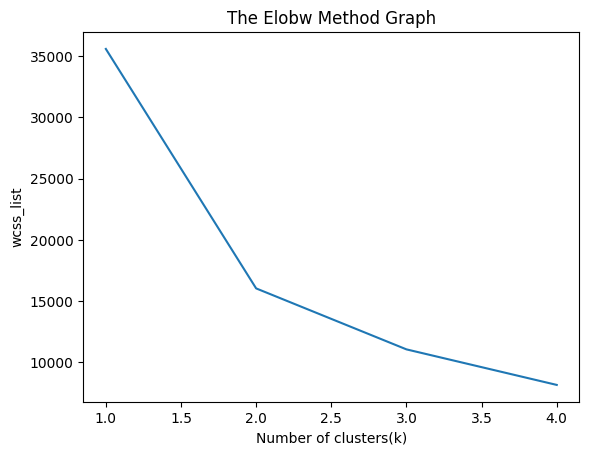

In [26]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,5):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 5), wcss)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

C:\Users\Thorne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


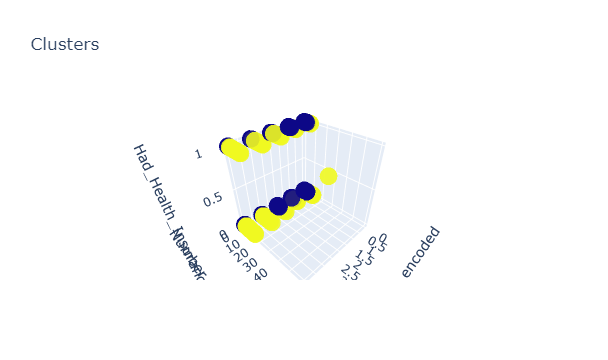

In [27]:
kmeans = KMeans(n_clusters=2, init = "k-means++", random_state = 42)
y_predict=kmeans.fit_predict(x)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

#Create a 3d plot to view the data sepparation made by Kmeans
trace1 = go.Scatter3d(
    x= x['Patient_age_encoded'],
    y= x['Number_of_Children'],
    z= x['Had_Health_Insurance'],
    mode='markers',
     marker=dict(
        color = labels, 
        size= 10,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Patient_age_encoded'),
            yaxis = dict(title  = 'Number_of_Children'),
            zaxis = dict(title  = 'Had_Health_Insurance')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)

#### Logistic Regression

In [30]:
from sklearn.impute import SimpleImputer
# Feature columns
feature_cols = ['Patient_Age', 'Patient_Gender', 'Marital_Status', 'Number_of_Children', 'Employment_Status', 'Monthly_Income', 'Last_Visit(Years)', 'Geographical_Code']
target_col = ['Had_Health_Insurance']
# Define numerical and categorical columns
numeric_features = ['Number_of_Children', 'Last_Visit(Years)']
categorical_features = ['Patient_Age', 'Patient_Gender', 'Marital_Status', 'Employment_Status', 'Monthly_Income']

# Define preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [32]:
# Splitting the data
X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [34]:
X_train[:5], y_train[:5]  # Display first 5 rows of preprocessed features and targets

(<5x24 sparse matrix of type '<class 'numpy.float64'>'
 	with 35 stored elements in Compressed Sparse Row format>,
       Had_Health_Insurance
 898                      1
 428                      1
 4711                     0
 1504                     0
 1513                     1)

In [49]:
# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, logreg_pred)
print(logreg_acc)

0.6964285714285714


C:\Users\Thorne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [50]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(rf_acc)

C:\Users\Thorne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.6776785714285715


In [51]:
# SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(svm_acc)

C:\Users\Thorne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.6973214285714285


In [52]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
print(gb_acc)

C:\Users\Thorne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.7008928571428571


In [39]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
kmeans_pred = kmeans.predict(X_test)

C:\Users\Thorne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [53]:
# Voting Classifier (Ensemble Method)
ensemble = VotingClassifier(
    estimators=[('logreg', logreg), ('rf', rf), ('svm', svm), ('gb', gb)],
    voting='hard'
)

ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)
ensemble_acc = accuracy_score(y_test, ensemble_pred)
print(ensemble_acc)


C:\Users\Thorne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Thorne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.7035714285714286


In [41]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Function to plot ROC Curve
def plot_roc_curve(model, X_test, y_test, title):
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(title)
    plt.show()

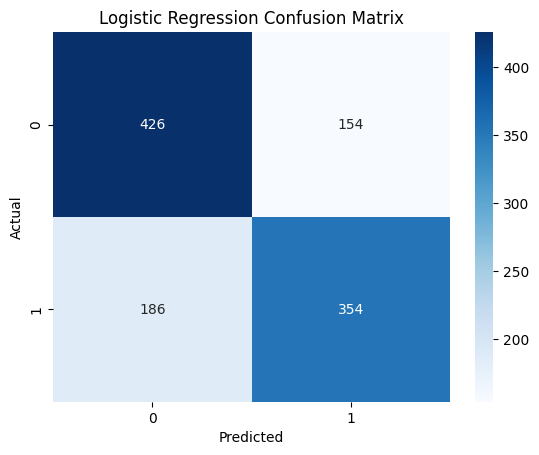

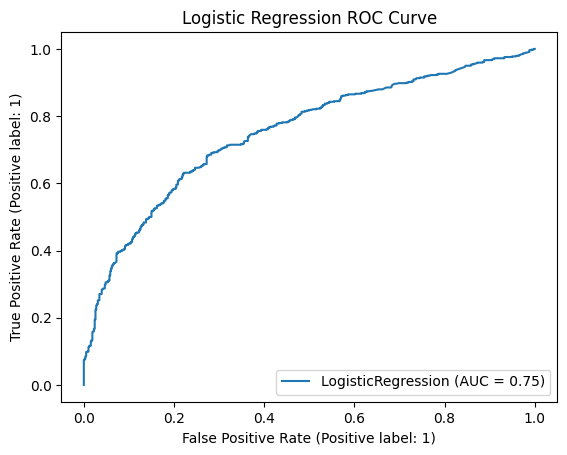

In [42]:
# Logistic Regression
plot_confusion_matrix(y_test, logreg_pred, 'Logistic Regression Confusion Matrix')
plot_roc_curve(logreg, X_test, y_test, 'Logistic Regression ROC Curve')

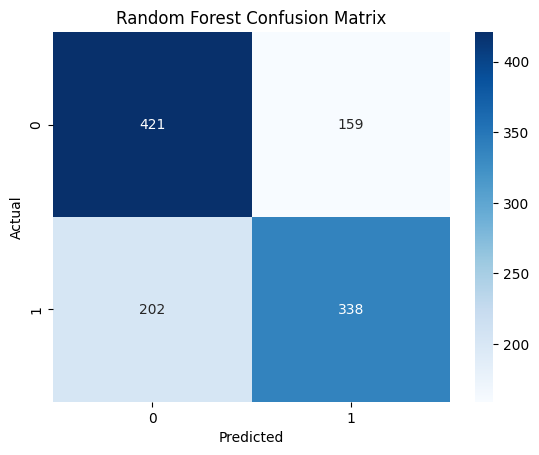

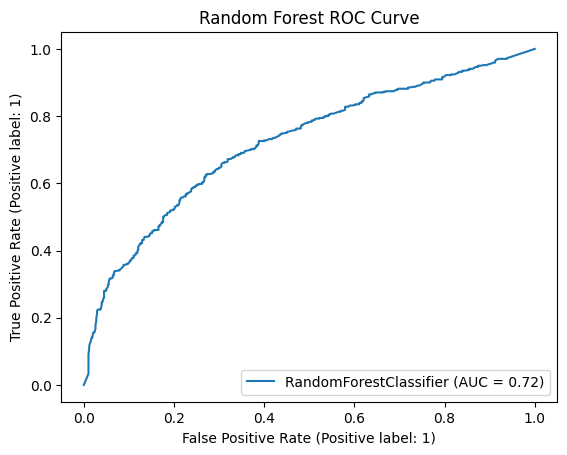

In [43]:
# Random Forest
plot_confusion_matrix(y_test, rf_pred, 'Random Forest Confusion Matrix')
plot_roc_curve(rf, X_test, y_test, 'Random Forest ROC Curve')

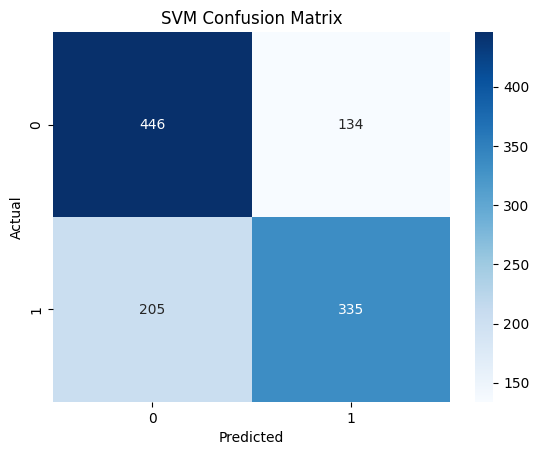

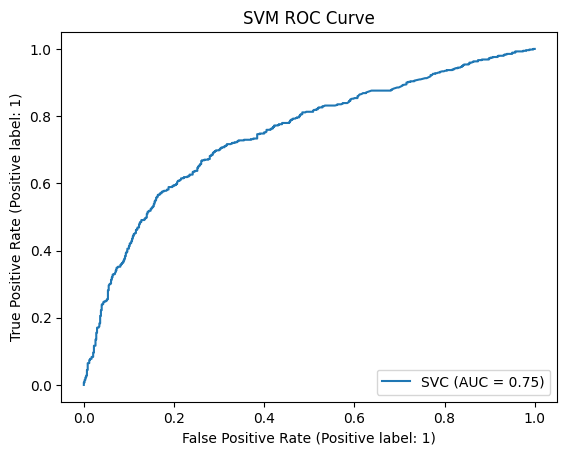

In [44]:
# SVM
plot_confusion_matrix(y_test, svm_pred, 'SVM Confusion Matrix')
plot_roc_curve(svm, X_test, y_test, 'SVM ROC Curve')

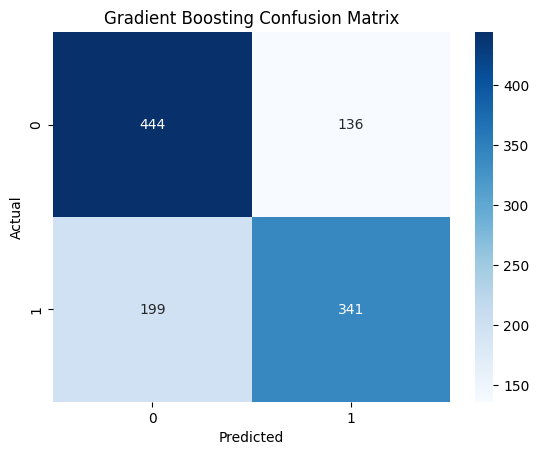

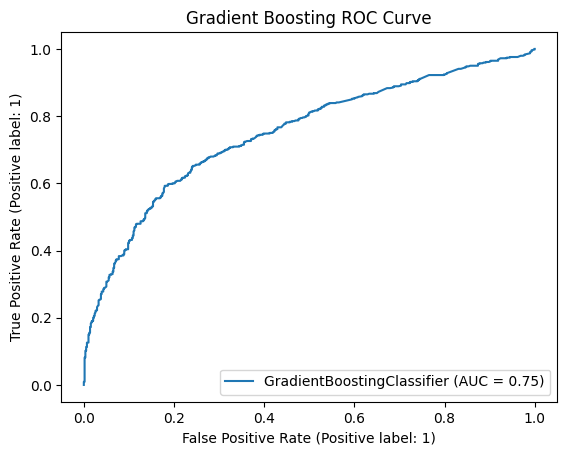

In [45]:
# Gradient Boosting
plot_confusion_matrix(y_test, gb_pred, 'Gradient Boosting Confusion Matrix')
plot_roc_curve(gb, X_test, y_test, 'Gradient Boosting ROC Curve')

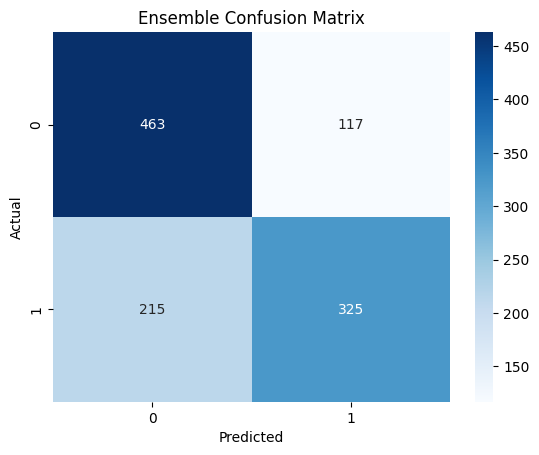

In [46]:
# Ensemble
plot_confusion_matrix(y_test, ensemble_pred, 'Ensemble Confusion Matrix')
# plot_roc_curve(ensemble, X_test, y_test, 'Ensemble ROC Curve')

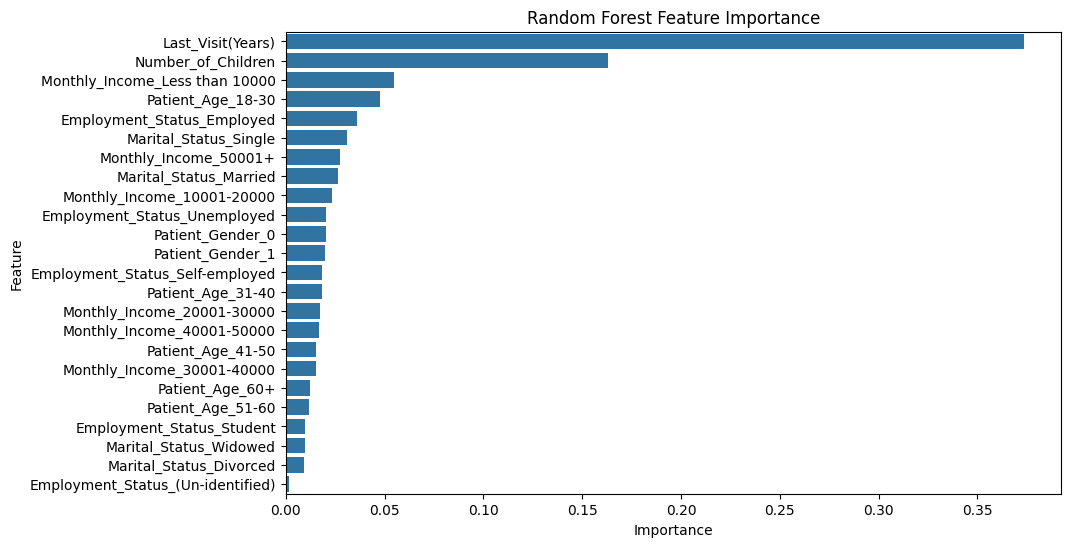

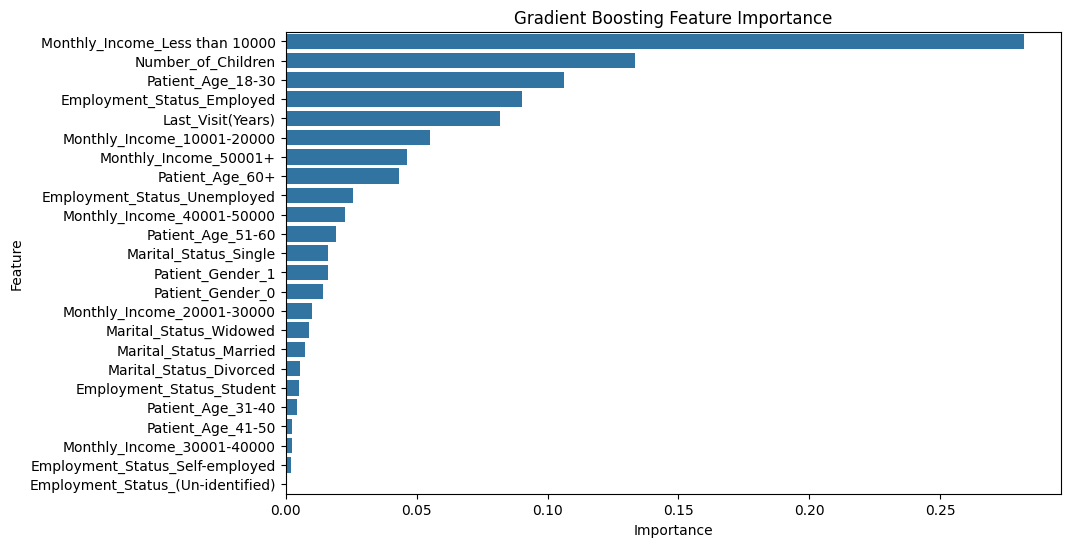

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [47]:
# Function to plot feature importance
def plot_feature_importance(model, title):
    feature_importances = model.feature_importances_

    # Get feature names from preprocessor
    categorical_features_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
    numeric_features_names = numeric_features
    features = list(numeric_features_names) + list(categorical_features_names)
    
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(title)
    plt.show()

# Random Forest Feature Importance
plot_feature_importance(rf, 'Random Forest Feature Importance')

# Gradient Boosting Feature Importance
plot_feature_importance(gb, 'Gradient Boosting Feature Importance')

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Plot clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis')
    plt.title(title)
    plt.show()

plot_clusters(X_pca, kmeans_pred, 'K-Means Clustering Visualization')

logreg_acc, rf_acc, svm_acc, gb_acc, ensemble_acc  # Display the accuracies of the models

In [48]:
import numpy as np

# Function to prompt user for input and handle missing values
def get_user_input():
    print("Please enter the following details. Leave blank if you don't know the value:")
    patient_age = input("Patient Age (e.g., '18-30', '31-40'): ") or np.nan
    patient_gender = input("Patient Gender (e.g., 'Male', 'Female'): ") or np.nan
    marital_status = input("Marital Status (e.g., 'Single', 'Married'): ") or np.nan
    number_of_children = input("Number of Children: ") or np.nan
    employment_status = input("Employment Status (e.g., 'Student', 'Unemployed', 'Employed'): ") or np.nan
    monthly_income = input("Monthly Income (e.g., 'Less than 10000', '10001-20000'): ") or np.nan
    last_visit = input("Last Visit (e.g., 10.0): ") or np.nan
    
    input_data = {
        'Patient_Age': patient_age,
        'Patient_Gender': patient_gender,
        'Marital_Status': marital_status,
        'Number_of_Children': float(number_of_children) if number_of_children else np.nan,
        'Employment_Status': employment_status,
        'Monthly_Income': monthly_income,
        'Last_Visit': float(last_visit) if last_visit else np.nan,
        'Geographical_Code': '-1.2852333,36.8556432'  # Default value since it's left out
    }
    
    return pd.DataFrame([input_data])

# Function to preprocess input data and make predictions
def predict_health_insurance(input_data):
    # Preprocess the input data
    input_data_transformed = preprocessor.transform(input_data)

    # Make predictions with all models
    logreg_prediction = logreg.predict(input_data_transformed)
    rf_prediction = rf.predict(input_data_transformed)
    svm_prediction = svm.predict(input_data_transformed)
    gb_prediction = gb.predict(input_data_transformed)
    ensemble_prediction = ensemble.predict(input_data_transformed)

    # Create a dictionary of predictions
    predictions = {
        'Logistic Regression': logreg_prediction[0],
        'Random Forest': rf_prediction[0],
        'SVM': svm_prediction[0],
        'Gradient Boosting': gb_prediction[0],
        'Ensemble': ensemble_prediction[0]
    }

    return predictions

# Get user input
user_input = get_user_input()

# Make predictions
predictions = predict_health_insurance(user_input)
print(predictions)


Please enter the following details. Leave blank if you don't know the value:


Patient Age (e.g., '18-30', '31-40'):  
Patient Gender (e.g., 'Male', 'Female'):  
Marital Status (e.g., 'Single', 'Married'):  
Number of Children:  
Employment Status (e.g., 'Student', 'Unemployed', 'Employed'):  
Monthly Income (e.g., 'Less than 10000', '10001-20000'):  
Last Visit (e.g., 10.0):  


KeyError: "['Last_Visit(Years)'] not in index"